In [183]:
%pylab inline
file_path = r'C:\Users\Administrator\Desktop\20170729113202-5.3.4.2-RR-调度次数相差大约3%，调度RB数相差较大，有时一个TTI调度2个UE，第一个UE只分3RB\RTL2_ulUeTtiInfo_20170729113202.csv'
cols = ['AirTime', 'UEGID', r'GRANT.u8Start']

Populating the interactive namespace from numpy and matplotlib


In [213]:
data = pd.read_csv(file_path, usecols=cols, na_values='-').dropna(axis=0, how='any')

In [214]:
data = data.sort_values(by=cols)
data = data[cols[:2]]
data.at[:, 'UE320Cnt'] = 0
data.at[:, 'UE317Cnt'] = 0
data.at[:, 'Delta'] = 0
#data[cols[0]] = data[cols[0]].apply(lambda x: x//16*10 + x%16)
#data[cols[0]] = data[cols[0]] - data[cols[0]].iat[0]

In [215]:
def findSchdCntErr(data):
    ue320cnt = 0
    ue317cnt = 0
    for index in data.index:
        if data.at[index, cols[1]] == 320:           
            ue320cnt = ue320cnt + 1
        else:       
            ue317cnt = ue317cnt + 1
        data.at[index, 'UE320Cnt'] = ue320cnt 
        data.at[index, 'UE317Cnt'] = ue317cnt
        data.at[index, 'Delta'] = ue320cnt - ue317cnt

In [216]:
findSchdCntErr(data)

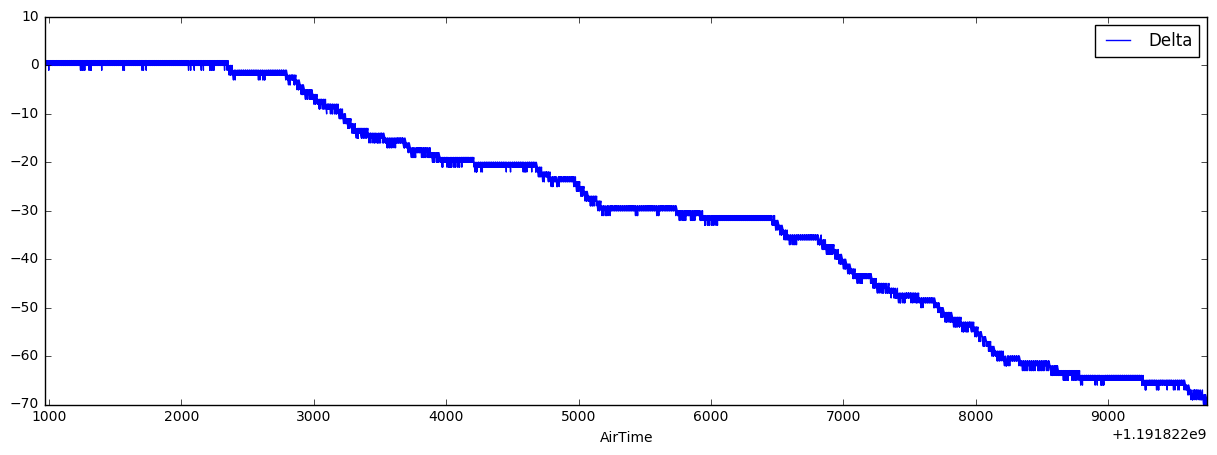

In [217]:
cnt_cols = [cols[0],'Delta']
cnt_data = data[cnt_cols]
cnt_data = cnt_data.set_index(cols[0])
cnt_data.plot(figsize=(15,5))

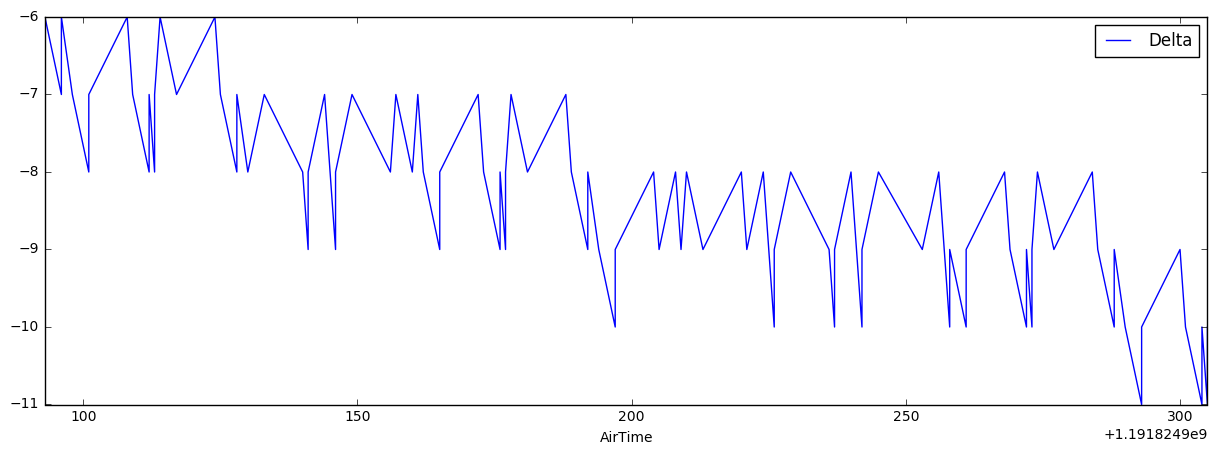

In [218]:
cnt_data[800:900].plot(figsize=(15,5))

In [219]:
data[800:900]

,AirTime,UEGID,UE320Cnt,UE317Cnt,Delta
2158,1191824993,317,397,404,-7
2159,1191824993,320,398,404,-6
2164,1191824996,317,398,405,-7
2163,1191824996,320,399,405,-6
2167,1191824998,317,399,406,-7
2173,1191825001,317,399,407,-8
2172,1191825001,320,400,407,-7
2174,1191825008,320,401,407,-6
2176,1191825009,317,401,408,-7
2183,1191825012,317,401,409,-8
